# **Title:** Cross-Domain Sentiment Analysis: Evaluating Model Performance from Electronics to Cosmetics Product Reviews

## **Part02** Model Building, Evaluation & hyperparameter tuning
### Model 1 TF-IDF + Logistic Regression

## Import Necessary Libraries

In [ ]:
# Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report


## Connect to drive

In [ ]:
# Connect  to drive to load dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Cleaned Data Set

In [ ]:
# Load cleaned dataset to train model

amazon_electronics_df = pd.read_csv('/content/drive/MyDrive/amazon_electronics_electronics_reviews_cleaned.csv')
sephora_skincare_df = pd.read_csv('/content/drive/MyDrive/sephora_skincare_skincare_reviews_cleaned.csv')

In [ ]:
# Show loaded dataset

amazon_electronics_df.head()

,Review,Rating,sentiment,review_length,polarity,label
0,well trying box towersthat sounded like music ...,5,positive,194,0.153092,2
1,ordered one wife one reading negative review p...,5,positive,140,0.220424,2
2,muy buen producto full juegos fhd hay problema...,5,positive,24,0.350000,2
3,sound quality unit phenomenal bose sounddock w...,5,positive,93,0.268527,2
4,good keeping cpu cool also downt forget downlo...,4,positive,24,0.525000,2


In [ ]:
# Show loaded dataset

sephora_skincare_df.head()

,Review,Rating,sentiment,review_length,polarity,label
0,best eye serum ever used well worth money boug...,5,positive,81,0.036944,2
1,helped much stubborn texture purchase life,5,positive,12,0.312500,2
2,honestly not like product nothing seem make br...,2,negative,20,0.100000,0
3,okay started quarantine trying find skin routi...,5,positive,113,0.236111,2
4,good work wonder redness away almost immediate...,5,positive,16,0.562500,2


## Train–Test Split

In [ ]:
# Split amazon_electronics dataset into train (80%) and test (20%)

X_train, X_test, y_train, y_test = train_test_split(amazon_electronics_df['Review'],amazon_electronics_df['label'],train_size=0.80,random_state=50,stratify=amazon_electronics_df['label'])

print("Training set size:", len(X_train))
print("Validation set size:", len(X_test))


Training set size: 7992
Validation set size: 1999


No train test split for sephora_skincare Dataset but keep separate for cross-domain testing

In [ ]:
# Prepare cross-domain test set (Sephora skincare reviews)

X_test_cross = sephora_skincare_df['Review']      # Text data for cross-domain testing
y_test_cross = sephora_skincare_df['label']       # Ground-truth sentiment labels

## Model  Building

## Model 1: TF-IDF + Logistic Regression

In [ ]:
# Initialize TF-IDF vectorizer

tfidf = TfidfVectorizer(
    max_features=10000,        # cap vocab size
    stop_words='english',      # remove stopwords
    ngram_range=(1,2)          # unigrams + bigrams capture short phrases
)

#### Fit on amazon_electronics Training Text and Transform

In [ ]:
# Fit on amazon_electronics train reviews, transform both train & validation dataset

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf   = tfidf.transform(X_test)

print("Train TF-IDF shape:", X_train_tfidf.shape)
print("Test TF-IDF shape:", X_test_tfidf.shape)

Train TF-IDF shape: (7992, 10000)
Test TF-IDF shape: (1999, 10000)


#### Train Logistic Regression Model

In [ ]:
# Initialize Logistic Regression

model_lr = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train on amazon_electronics (source domain)
model_lr.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

## Save trained model

In [ ]:
import joblib

# Save the model
joblib.dump(model_lr,'/content/drive/MyDrive/logistic_regression_model.pkl')

['/content/drive/MyDrive/logistic_regression_model.pkl']

## Load Saved Model

In [ ]:
# Load it back later

lr_loaded = joblib.load('/content/drive/MyDrive/logistic_regression_model.pkl')

### Evaluation (In-Domain)

amazon_electronics (In-Domain) Evaluation:
              precision    recall  f1-score   support

           0       0.51      0.58      0.54       226
           1       0.20      0.33      0.25       178
           2       0.91      0.82      0.86      1595

    accuracy                           0.75      1999
   macro avg       0.54      0.58      0.55      1999
weighted avg       0.80      0.75      0.77      1999



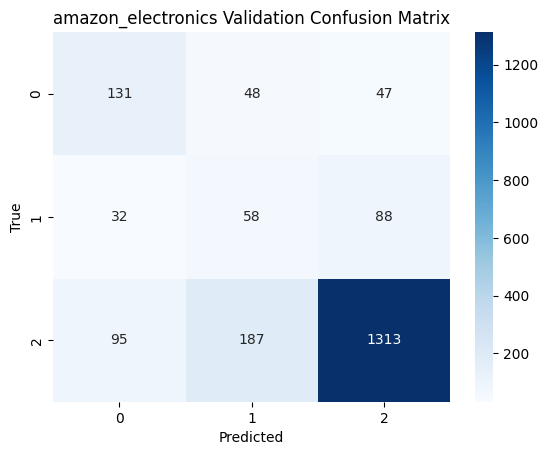

In [ ]:
# Predict on test dataset
y_pred = lr_loaded.predict(X_test_tfidf)

print("amazon_electronics (In-Domain) Evaluation:")
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
cm_val = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues')
plt.title("amazon_electronics Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Cross-Domain Evaluation (sephora_skincare)


sephora_skincare (Cross-Domain) Evaluation:
              precision    recall  f1-score   support

           0       0.40      0.42      0.41       540
           1       0.19      0.34      0.24       415
           2       0.90      0.82      0.86      4033

    accuracy                           0.74      4988
   macro avg       0.50      0.53      0.50      4988
weighted avg       0.79      0.74      0.76      4988



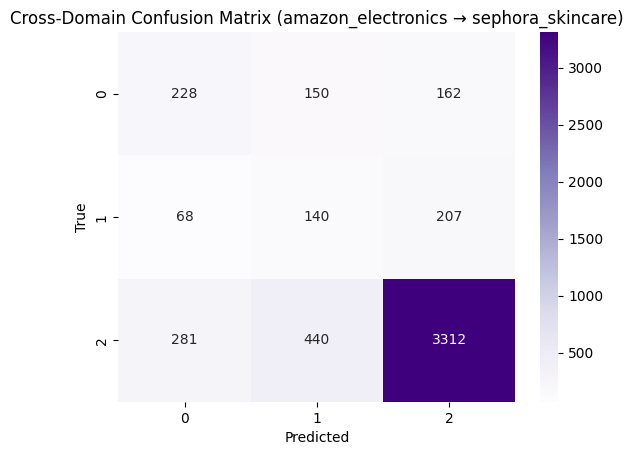

In [ ]:
# Transform sephora_skincare text using same TF-IDF vectorizer
X_sephora_skincare_tfidf = tfidf.transform(sephora_skincare_df['Review'])
y_sephora_skincare = sephora_skincare_df['label']

# Predict and evaluate
y_pred_sephora_skincare = lr_loaded.predict(X_sephora_skincare_tfidf)

print("\nsephora_skincare (Cross-Domain) Evaluation:")
print(classification_report(y_sephora_skincare, y_pred_sephora_skincare))

# Cross-domain confusion matrix
cm_cross = confusion_matrix(y_sephora_skincare, y_pred_sephora_skincare)
sns.heatmap(cm_cross, annot=True, fmt='d', cmap='Purples')
plt.title("Cross-Domain Confusion Matrix (amazon_electronics → sephora_skincare)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Compare Performance

In [ ]:
# Calculate metrics for amazon_electronics (in-domain)
amazon_electronics_acc = accuracy_score(y_test, y_pred)
amazon_electronics_precision = precision_score(y_test, y_pred, average='weighted')
amazon_electronics_recall = recall_score(y_test, y_pred, average='weighted')
amazon_electronics_f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate metrics for sephora_skincare (cross-domain)
sephora_skincare_acc = accuracy_score(y_sephora_skincare, y_pred_sephora_skincare)
sephora_skincare_precision = precision_score(y_sephora_skincare, y_pred_sephora_skincare, average='weighted')
sephora_skincare_recall = recall_score(y_sephora_skincare, y_pred_sephora_skincare, average='weighted')
sephora_skincare_f1 = f1_score(y_sephora_skincare, y_pred_sephora_skincare, average='weighted')

# Create DataFrame for comparison
results_lr = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression'],
    'Dataset': ['Amazon Electronics (In-domain)', 'Sephora Skincare (Cross-domain)'],
    'Accuracy': [amazon_electronics_acc, sephora_skincare_acc],
    'Precision': [amazon_electronics_precision, sephora_skincare_precision],
    'Recall': [amazon_electronics_recall, sephora_skincare_recall],
    'F1-score': [amazon_electronics_f1, sephora_skincare_f1]
})

#Save Logistic Regression results to CSV
results_lr.to_csv('/content/drive/MyDrive/logistic_regression_results.csv', index=False)

# Display results
print("\n=== Performance Comparison ===")
results_lr


=== Performance Comparison ===


,Model,Dataset,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,Amazon Electronics (In-domain),0.751376,0.798540,0.751376,0.771689
1,Logistic Regression,Sephora Skincare (Cross-domain),0.737771,0.786223,0.737771,0.758834


# Visualization

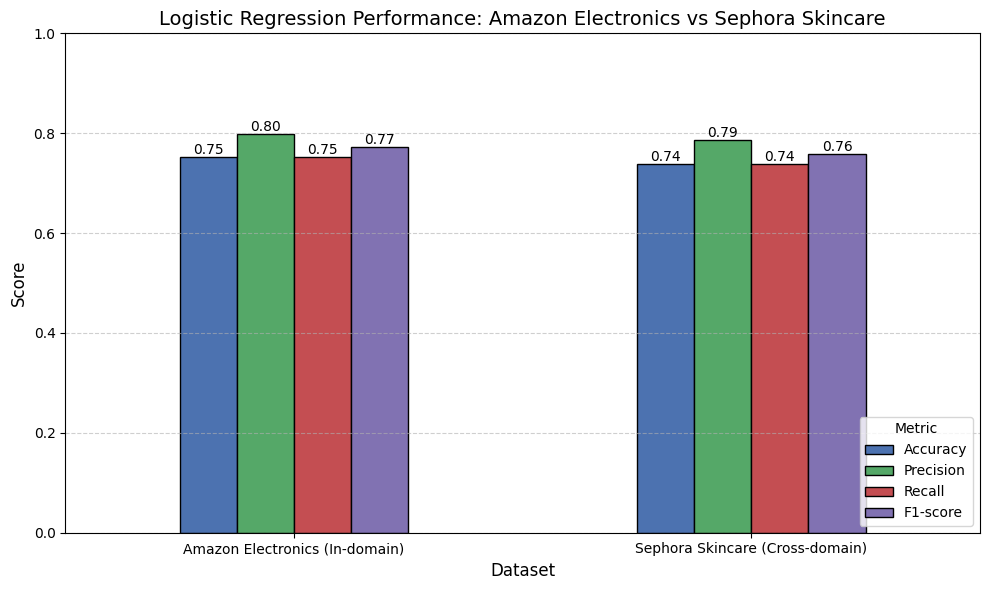

In [ ]:
# Select metrics and set index
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
df_plot = results_lr.set_index('Dataset')[metrics]

# Plot
ax = df_plot.plot(
    kind='bar',
    figsize=(10, 6),
    color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'],
    edgecolor='black'
)

# Add title and labels
plt.title('Logistic Regression Performance: Amazon Electronics vs Sephora Skincare', fontsize=14)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars with their values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, rotation=0)

# Adjust legend
plt.legend(title='Metric', loc='lower right')

# Show plot
plt.tight_layout()
plt.show()